In [83]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
import pandas as pd
import numpy as np
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from sympy import Rational as R
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML


In [8]:
# Let us create a UDF which will enable us to shade areas under the curve for standardnormal distribution

def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(z, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [9]:
# Let us create a UDF which will enable us to shade areas under the curve for t-distribution

def draw_t_score(x, df, cond, mu, sigma, title):
    y = t.pdf(x, df, mu, sigma)
    t = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(t, t.pdf(t, df, mu, sigma))
    plt.title(title)
    plt.show()

## Problems 6
The first five exercises er from today’s topics. Do these first. The rest is a bit of everything, including
covariance and correlation which we did not do exercises in yet.

## Exercise 1 Book(ASPE: 8.1.7) </br>
A manufacturer produces piston rings for an automo-
bile engine. It is known that ring diameter is normally distributed
with σ = 0.001 millimeters. A random sample of 15 rings has a
mean diameter of $\overline{x}$ = 74.036 millimeters. </br>
n=15 ; $\sigma$ = 0.001 mm ; $\overline{x}$ = 74.036 mm

**a)** Construct a 99% two-sided confidence interval on the
mean piston ring diameter. </br>

Two sided CI formula </br>
Upper: $\overline{x}$ + $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ 

99%: $z_{1- \frac{\alpha}{2}}$ = 2.58 </br>

Upper: 74.036 + 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>
Lower: 74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>

74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ $\leq$ $\mu$ $\leq$ 74.036 + 2.58 *  $\frac{0.001}{\sqrt{15}}$


A 99.0 % confidence interval for the sample mean is [74.0353 ; 74.0367]


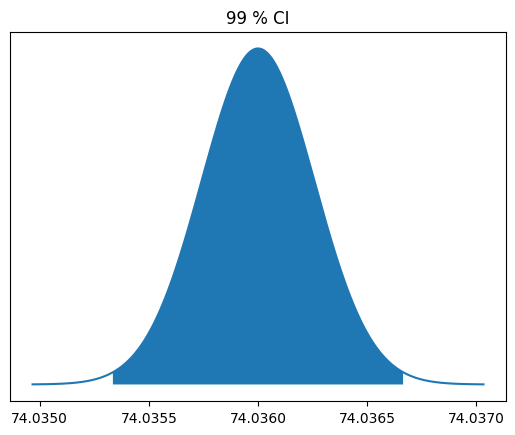

In [33]:
sample_mean = 74.036 ## sample mean
standard_deviation = 0.001 
n = 15 ## sample size
SE = standard_deviation/np.sqrt(n) ## standard error
level_of_confidence = 0.99

CI = norm.interval(level_of_confidence, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(sample_mean-4*SE, sample_mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), sample_mean, SE, '99 % CI')

**b)** Construct a 99% lower-confidence bound on the mean
piston ring diameter. Compare the lower bound of this confi-
dence interval with the one in part (a). </br>

One sided CI formula </br>
Lower: $\overline{x}$ - $z_{1- \alpha}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>

99%: $z_{1- \alpha}$ = 2.33 </br>
n=15 </br> $\sigma$ = 0.001 mm </br> $\overline{x}$ = 74.036 mm </br> $\alpha$ = 0.01

Lower: 74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>

74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ $\leq$ $\mu$


A 99.0 % lower confidence interval for the sample mean is 74.035399 < μ 


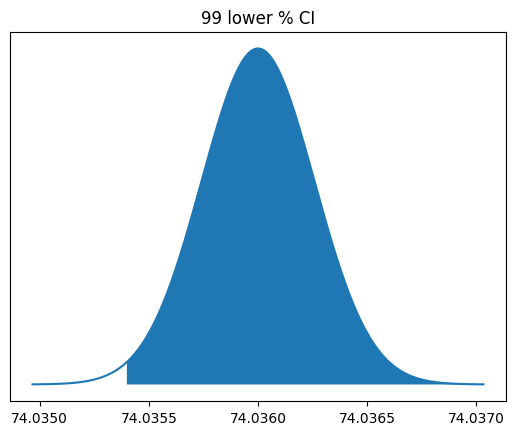

In [31]:

## Please notice THIS / since we taking in consideration just one side we have to take the full alpha(error) which is 1 % => aplha = 2%
level_of_confidence = 0.98
standard_deviation = 0.001 
n = 15 ## sample size
SE = standard_deviation/np.sqrt(15) ## standard error
sample_mean = 74.036

CI = norm.interval(level_of_confidence, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100+1) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],6)) + ' < \u03bc ')

x = np.linspace(sample_mean-4*SE, sample_mean+4*SE, 1000)

draw_z_score(x, CI[0] <= x, sample_mean, SE, '99 lower % CI')

## Exercise 2 Book(ASPE: 8.1.8) </br>
A civil engineer is analyzing the compressive strength of concrete. Compressive strength is normally distributed  with $σ^2 = 1000(psi)^2$ . A random sample of 12 specimens has a mean compressive strength of $\overline{x}$ = 3250 psi. </br>
n=12 ; $\sigma =  \sqrt{1000(psi)^2}$; $\overline{x}$ = 3250 psi

**a)** Construct a 95% two-sided confidence interval on mean compressive strength. </br>

Two sided CI formula </br>
Upper: $\overline{x}$ + $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ 

95%: $z_{1- \frac{\alpha}{2}}$ = 1.96 </br>
Upper: 3250 + 1.96 *  $\frac{10}{\sqrt{12}}$ </br>
Lower: 3250 - 1.96 *  $\frac{10}{\sqrt{12}}$ </br>

3250 - 1.96 *  $\frac{0.001}{\sqrt{12}}$ $\leq$ $\mu$ $\leq$ 3250 + 1.96 *  $\frac{0.001}{\sqrt{12}}$ 


A 95.0 % confidence interval for the sample mean is [3232.1081 ; 3267.8919]


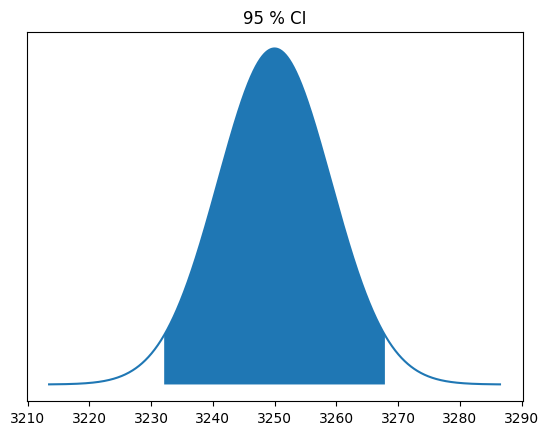

In [34]:

variance = 1000
standard_deviation = np.sqrt(variance)
n = 12
SE = standard_deviation/np.sqrt(n) ## standard error
sample_mean = 3250
level_of_confidence = 0.95

CI = norm.interval(level_of_confidence, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(sample_mean-4*SE, sample_mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), sample_mean, SE, '95 % CI')

**b)** Construct a 99% two-sided confidence interval on mean compressive strength. Compare the width of this confidence interval with the width of the one found in part (a). </br>

Two sided CI formula </br>
Upper: $\overline{x}$ + $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ 

99%: $z_{1- \frac{\alpha}{2}}$ = 2.58 </br>
Upper: 3250 + 2.58 *  $\frac{10}{\sqrt{12}}$ </br>
Lower: 3250 - 2.58 *  $\frac{10}{\sqrt{12}}$ </br>

3250 - 2.58 *  $\frac{10}{\sqrt{12}}$ $\leq$ $\mu$ $\leq$ 3250 + 2.58 *  $\frac{10}{\sqrt{12}}$ 


A 99.0 % confidence interval for the sample mean is [3226.486 ; 3273.514]


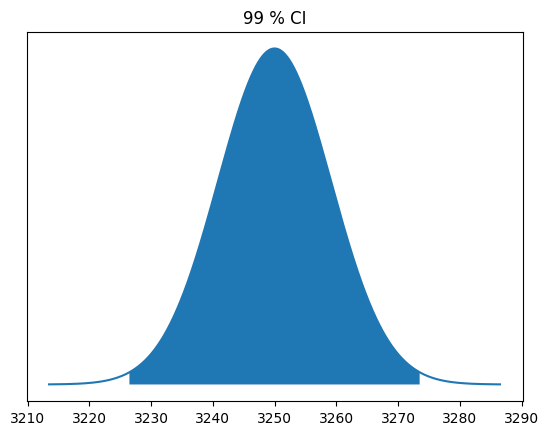

In [35]:
variance = 1000
standard_deviation = np.sqrt(variance)
n = 12
SE = standard_deviation/np.sqrt(n) ## standard error
sample_mean = 3250
level_of_confidence = 0.99

CI = norm.interval(level_of_confidence, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(sample_mean-4*SE, sample_mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), sample_mean, SE, '99 % CI')

## Exercise 3 Book(ASPE: 8.2.10) </br>
An article in Computers & Electrical Engineer-ing [“Parallel Simulation of Cellular Neural Networks” (1996, Vol. 22, pp. 61–84)] considered the speedup of cellular neural networks (CNNs) for a parallel general-purpose computing architecture based on six transputers in different areas.</br> 
The data follow:</br>
3.775302  3.350679  4.217981  4.030324  4.639692 </br>
4.139665  4.395575  4.824257  4.268119  4.584193</br>
4.930027  4.315973  4.600101 </br>

**a)** Is there evidence to support the assumption that speedup of CNN is normally distributed? Include a graphical display in your answer.

0.4158226149655274


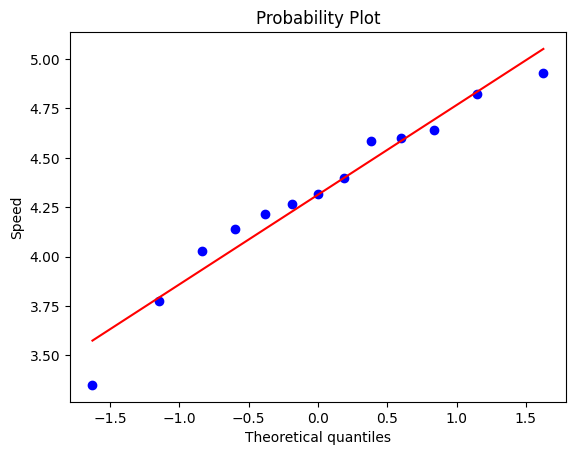

Skewness = -0.6732
Kurtosis = 0.0515


<Axes: title={'center': 'Distribution'}, ylabel='Density'>

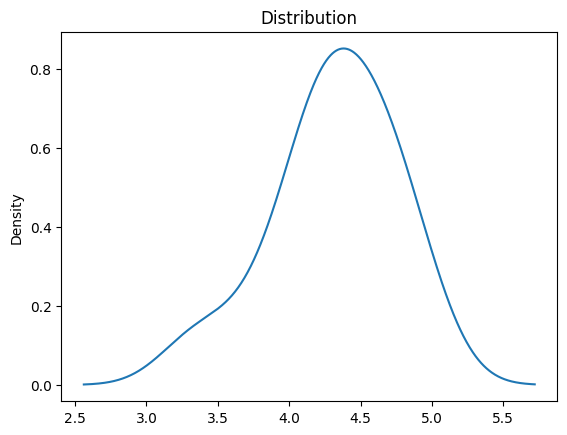

In [23]:
a = [3.7753, 3.350679, 4.217981, 4.030324, 4.639692, 4.139665, 4.395575, 4.824257, 4.268119, 4.584193, 4.930027, 4.315973, 4.600101]

# a) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(a, plot=plt)
plt.ylabel('Speed')
plt.show()
print('Skewness = ' + repr(round(stats.skew(a),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(a),4)))
df = pd.DataFrame(a)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution')

**b)** Construct a 95% two-sided confidence interval on the mean speedup. </br>

n = length of the array(data experiments). </br>
SE = Calculate the standard error of the mean (or standard error of measurement) of the values in the input array (data set).</br>
mean = average of the array.</br>
Level = the CI level</br>
Two sided CI formula </br>
Upper: $\overline{x}$ + $t_{\frac{\alpha}{2}, n-1}$ *  $\frac{S}{\sqrt{n}}$ (SE) </br>
Lower: $\overline{x}$ - $t_{\frac{\alpha}{2}, n-1}$ *  $\frac{S}{\sqrt{n}}$ (SE) </br>
S= degree of freedom, stats.tstd(array)

95%: $t_{\frac{\alpha}{2}, n-1}$ </br>
Upper: 4.3132 + $t_{\frac{\alpha}{2}, n-1}$ * 0.1200 </br>
Lower: 4.3132 - $t_{\frac{\alpha}{2}, n-1}$ * 0.1200 </br>

3250 - 1.96 *  $\frac{0.001}{\sqrt{12}}$ $\leq$ $\mu$ $\leq$ 3250 + 1.96 *  $\frac{0.001}{\sqrt{12}}$ 


A 95.0 % confidence interval for the sample mean is [4.0517 ; 4.5748]


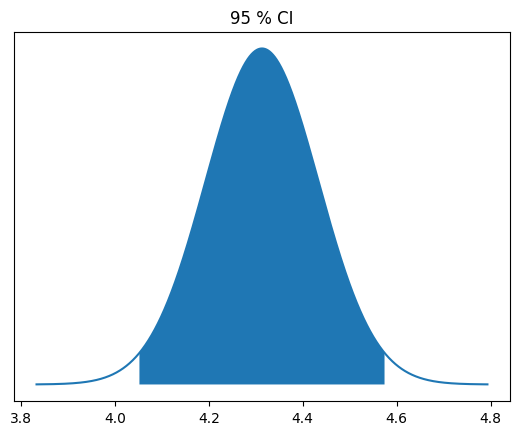

In [36]:
a = [3.7753, 3.350679, 4.217981, 4.030324, 4.639692, 4.139665, 4.395575, 4.824257, 4.268119, 4.584193, 4.930027, 4.315973, 4.600101]

n = len(a) ## sample size
SE = stats.sem(a) ## standard error
sample_mean = np.mean(a) 
level_of_confidence = 0.95

CI = stats.t.interval(level_of_confidence, n-1, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(sample_mean-4*SE, sample_mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), sample_mean, SE, '95 % CI')

**c)** Construct a 95% lower confidence bound on the mean speedup. </br>

n = length of the array(data experiments). </br>
SE = Calculate the standard error of the mean (or standard error of measurement) of the values in the input array (data set).</br>
mean = average of the array.</br>
Level = the CI level</br>
Two sided CI formula </br>
Upper: $\overline{x}$ + $t_{\frac{\alpha}{2}, n-1}$ *  $\frac{S}{\sqrt{n}}$ (SE) </br>
Lower: $\overline{x}$ - $t_{\frac{\alpha}{2}, n-1}$ *  $\frac{S}{\sqrt{n}}$ (SE) </br>
S = degree of freedom, stats.tstd(array)

90%: $t_{\frac{\alpha}{2}, n-1}$ </br>

Lower: 4.3132 - $t_{\frac{\alpha}{2}, n-1}$ * 0.1200 </br>

3250 - 1.96 *  $\frac{0.001}{\sqrt{12}}$ $\leq$ $\mu$ $\leq$ 3250 + 1.96 *  $\frac{0.001}{\sqrt{12}}$ 


A 95.0 % lower confidence interval for the sample mean is 4.0993 < μ 


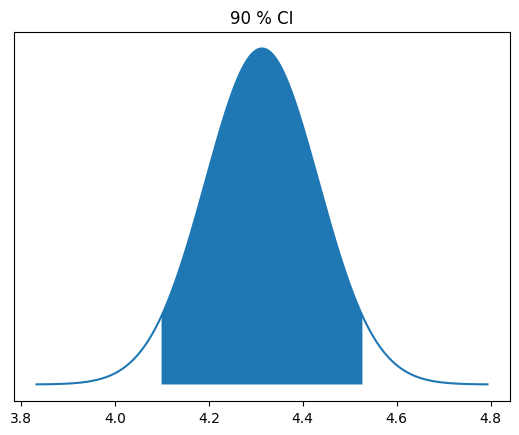

In [37]:
a = [3.7753, 3.350679, 4.217981, 4.030324, 4.639692, 4.139665, 4.395575, 4.824257, 4.268119, 4.584193, 4.930027, 4.315973, 4.600101]

## Please notice THIS / since we taking in consideration just one side we have to take the full alpha(error) which is 5 % => aplha = 10%
level_of_confidence = 0.90
n = len(a) ## sample size
SE = stats.sem(a) ## standard error
sample_mean = np.mean(a)

CI = stats.t.interval(level_of_confidence, n-1, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100+5) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],4)) + ' < \u03bc ')

x = np.linspace(sample_mean-4*SE, sample_mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), sample_mean, SE, '90 % CI')

## Exercise 4 Book(ASPE: 8.3.5) </br>
An article in Technometrics [“Two-Way Random Effects Analyses and Gauge R&R Studies” (1999, Vol. 41(3), pp. 202–211)] studied the capability of a gauge by measuring the weight of paper. The data for repeated measurements of one sheet of paper are in the following table. Construct a 95% one-sided upper confidence interval for the standard deviation of these measurements. Check the assumption of normality of the data and comment on the assumptions for the confidence interval.</br>
**Observations** </br>
3.481 3.448 3.485 3.475 3.472
3.477 3.472 3.464 3.472 3.470
3.470 3.470 3.477 3.473 3.474 </br>

(3.4682224106080515, 3.4757775893919485)
A 95.0 % upper confidence interval for the sample mean is 3.4758 < μ 


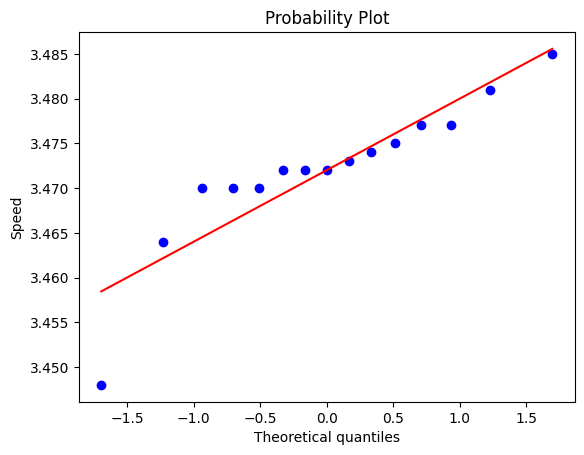

Skewness = -1.4381
Kurtosis = 2.986


<Axes: title={'center': 'Distribution'}, ylabel='Density'>

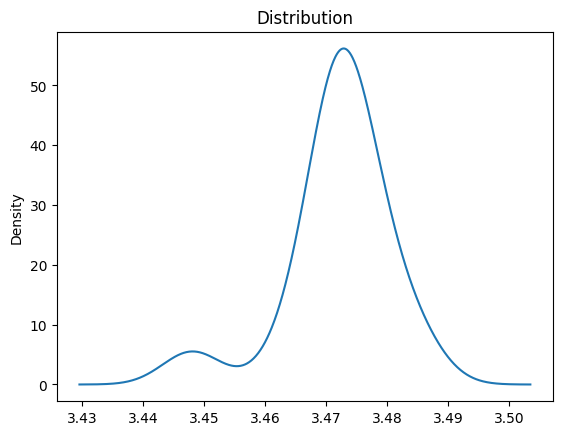

In [41]:
a = [3.481, 3.448, 3.485, 3.475, 3.472,3.477, 3.472, 3.464, 3.472, 3.470, 3.470, 3.470, 3.477, 3.473, 3.474]

## Please notice THIS / since we taking in consideration just one side we have to take the full alpha(error) which is 5 % => aplha = 10%
level_of_confidence = 0.90
n = len(a) ## sample size
SE = stats.sem(a) ## standard error
sample_mean = np.mean(a)

CI = stats.t.interval(level_of_confidence, n-1, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100+5) + ' % upper confidence interval for the sample mean is '+ repr(round(CI[1],4)) + ' < \u03bc ')

# a) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(a, plot=plt)
plt.ylabel('Speed')
plt.show()
print('Skewness = ' + repr(round(stats.skew(a),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(a),4)))
df = pd.DataFrame(a)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution')


## Exercise 5 Book(ASPE: 8.4.1) </br>
The 2004 presidential election exit polls from the critical state of Ohio provided the following results. The exit polls had 2020 respondents, 768 of whom were college graduates. Of the college graduates, 412 voted for George Bush.</br>

**a)** Calculate a 95% confidence interval for the proportion of college graduates in Ohio who voted for George Bush.</br>

This exercise is solved using  **Approximate Confidence Interval on a Binomial Proportion**: </br> $\overline{p}= \frac {x}{n}$, where x is the number of items in a random sample of size n that belong to the class of interest.</br>
$\overline{p}:$ is a point estimator of the proportion of the population p that belongs to this class

Two sided CI formula </br>
Upper: $\overline{p}$ + $z_{\frac{\alpha}{2}}$ _ $\sqrt{\frac{\overline{p}*(1-\overline{p})}{n}}$ </br>
Lower: $\overline{p}$ - $z_{\frac{\alpha}{2}}$ _ $\sqrt{\frac{\overline{p}*(1-\overline{p})}{n}}$</br>
95%: $z_{\frac{\alpha}{2}}$ = 1.96 </br>

A 95.0 % confidence interval for the sample proportion is [0.5012 ; 0.5717]


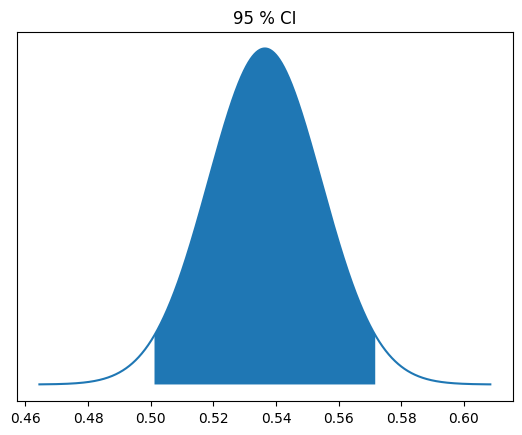

In [44]:
sample_size = 768
sample_size_proportion = 412
point_estimator = sample_size_proportion/sample_size
SE = np.sqrt((point_estimator*(1-point_estimator))/sample_size) ## standard error 
level_of_confidence = 0.95

CI = stats.norm.interval(level_of_confidence, loc=point_estimator, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample proportion is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(point_estimator-4*SE, point_estimator+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), point_estimator, SE, '95 % CI')

**b)** Calculate a 95% lower confidence bound for the proportion of college graduates in Ohio who voted for George Bush.
</br>
This exercise is solved using  **Approximate Confidence Interval on a Binomial Proportion**: </br> $\overline{p}= \frac {x}{n}$, where x is the number of items in a random sample of size n that belong to the class of interest.</br>
$\overline{p}:$ is a point estimator of the proportion of the population p that belongs to this class

One sided CI formula </br>
Lower: $\overline{p}$ - $z_{\frac{\alpha}{2}}$ _ $\sqrt{\frac{\overline{p}*(1-\overline{p})}{n}}$</br>
90%: $z_{\frac{\alpha}{2}}$ = 1.64 </br>

A 90.0 % lower confidence interval for the sample proportion is: 0.5069<= p


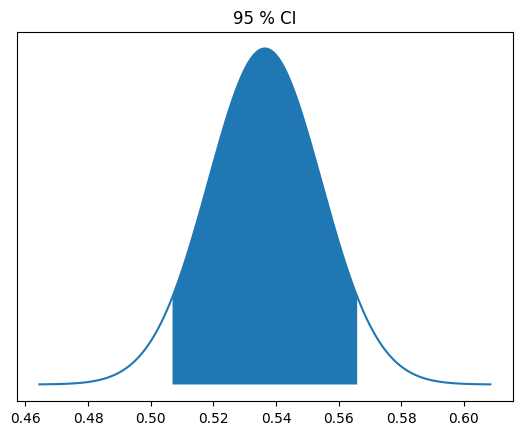

In [50]:
sample_size = 768
sample_size_proportion = 412
point_estimator = sample_size_proportion/sample_size
SE = np.sqrt((point_estimator*(1-point_estimator))/sample_size) ## standard error 
level_of_confidence = 0.90

CI = stats.norm.interval(level_of_confidence, loc=point_estimator, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % lower confidence interval for the sample proportion is: ' + repr(round(CI[0],4)) + '<= p')

x = np.linspace(point_estimator-4*SE, point_estimator+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), point_estimator, SE, '95 % CI')

## Exercise 6  </br>
Let X be a continuous random variable with PDF:</br>
$f_X(x)= \begin{pmatrix}\frac{5}{32}*x^4,& 0 \leq x \leq 2 \cr 0, & otherwise\cr\end{pmatrix}$</br>
and let $Y=X^2$.

**a)** Find CDF of Y </br> 
$F_Y(y)= P(Y\leq y)=$</br>
$P(X^2\leq y)=$</br>
$P(0 \leq X\leq \sqrt{y})=$</br>
$\int_0^{\sqrt{y}} \frac{5}{32}*x^4 dx$</br>

In [96]:
x, y= symbols('x, y')

fy = R(5,32)*x**4
upper_limit =y**(1/2)
cdf = sp.integrate(fy, (x,0, upper_limit))

display(Math(r'F_Y(y) = \begin{pmatrix} 0, &  y < 0 \cr'+ latex(cdf)+',& 0 \leq y \leq 4 \cr 0, & y>4\cr\end{pmatrix}'))

<IPython.core.display.Math object>

**b)** Find PDF of Y </br> 
$f_{Y}(y)=F\rq _Y(y)$</br>

In [115]:
x, y= symbols('x, y')

fy = R(5,32)*x**4
upper_limit =y**(R(1,2))
cdf = sp.integrate(fy, (x,0, upper_limit))
pdf = cdf.diff(y)

display(Math(r'f_{Y}(y)=F\rq _Y(y) = \begin{pmatrix}'+ latex(pdf)+',& 0 \leq y \leq 4 \cr 0, & otherwise\cr\end{pmatrix}'))

<IPython.core.display.Math object>

**c)** Find $EY$ </br>
To find the EY , we can directly apply LOTUS: </br>
$E[Y]=E[X^2]= \int_{-oo}^{oo} x^2f(x)dx = $</br>
$\int_{0}^{2} x^2* \frac {5}{32}*x^4dx $</br>

In [117]:
x, y= symbols('x, y')

fx = x**2*R(5,32)*x**4

EX = sp.integrate(fx, (x, 0, 2))

display(Math(r'E(X) = '+ '%s' % (latex(EX))))

<IPython.core.display.Math object>